In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
import sys, os
from matplotlib import pyplot as plt
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder
from itertools import product
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix





%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")







In [2]:
df = pd.read_csv("voice.csv")
df.head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

<AxesSubplot:xlabel='label', ylabel='count'>

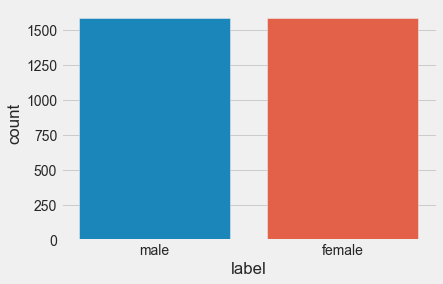

In [3]:
sns.countplot(x='label', data=df)

In [4]:
# creating instance of labelencoder
label_encode = LabelEncoder()

# Perform Encoding by coverting 'label' feature into numerical form
df['label'] = label_encode.fit_transform(df['label'])

df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,0
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,0
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,0
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,0


In [5]:
count_values = pd.value_counts(df['label'])
count_values

0    1584
1    1584
Name: label, dtype: int64

In [6]:
#Find the correlation b/w the dataset
df.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,...,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979,-0.337415
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,...,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660,0.479539
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,...,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298,-0.283919
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,...,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377,-0.511455
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,...,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475,0.066906
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,...,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252,0.618916
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,...,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325,0.036627
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,...,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539,0.087195
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,...,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074,0.490552
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,...,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477,0.357499


<AxesSubplot:>

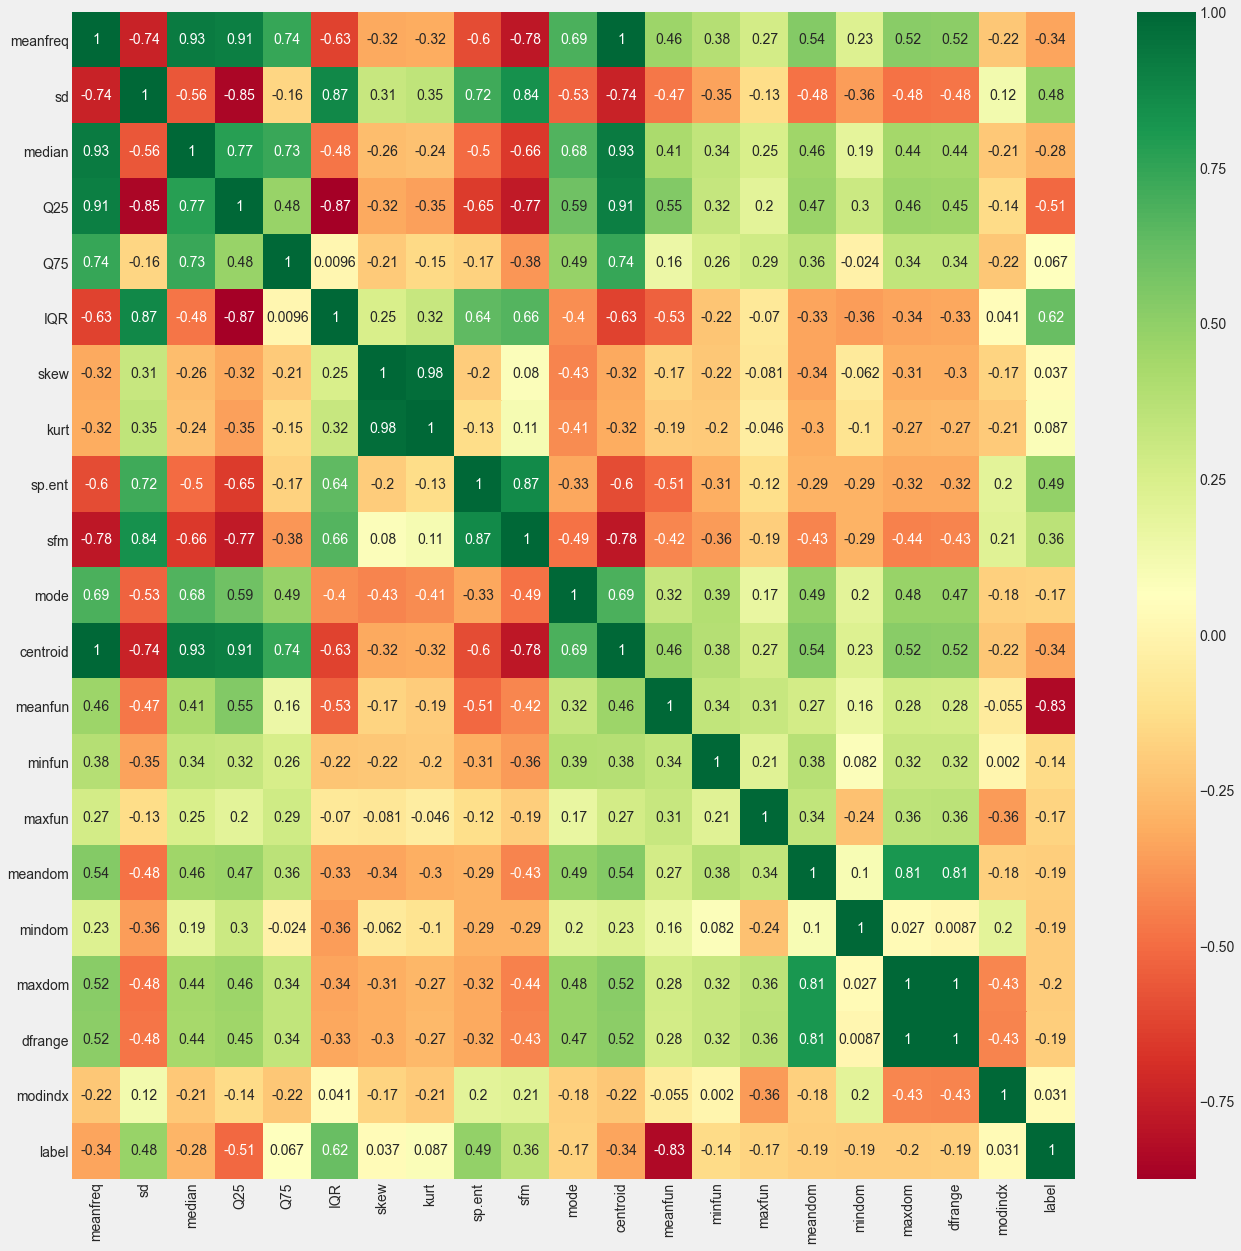

In [7]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),annot = True,  cmap = 'RdYlGn')

In [8]:
#dependend and independent dataset
X = df.iloc[:,:-1]
y = df.iloc[:,20]

In [9]:
X

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,0.200836,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,0.013683,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,0.008006,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,0.212202,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002


In [10]:
#encode the dependent dataset using LabelEncoder
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
print(y)

[1 1 1 ... 0 0 0]


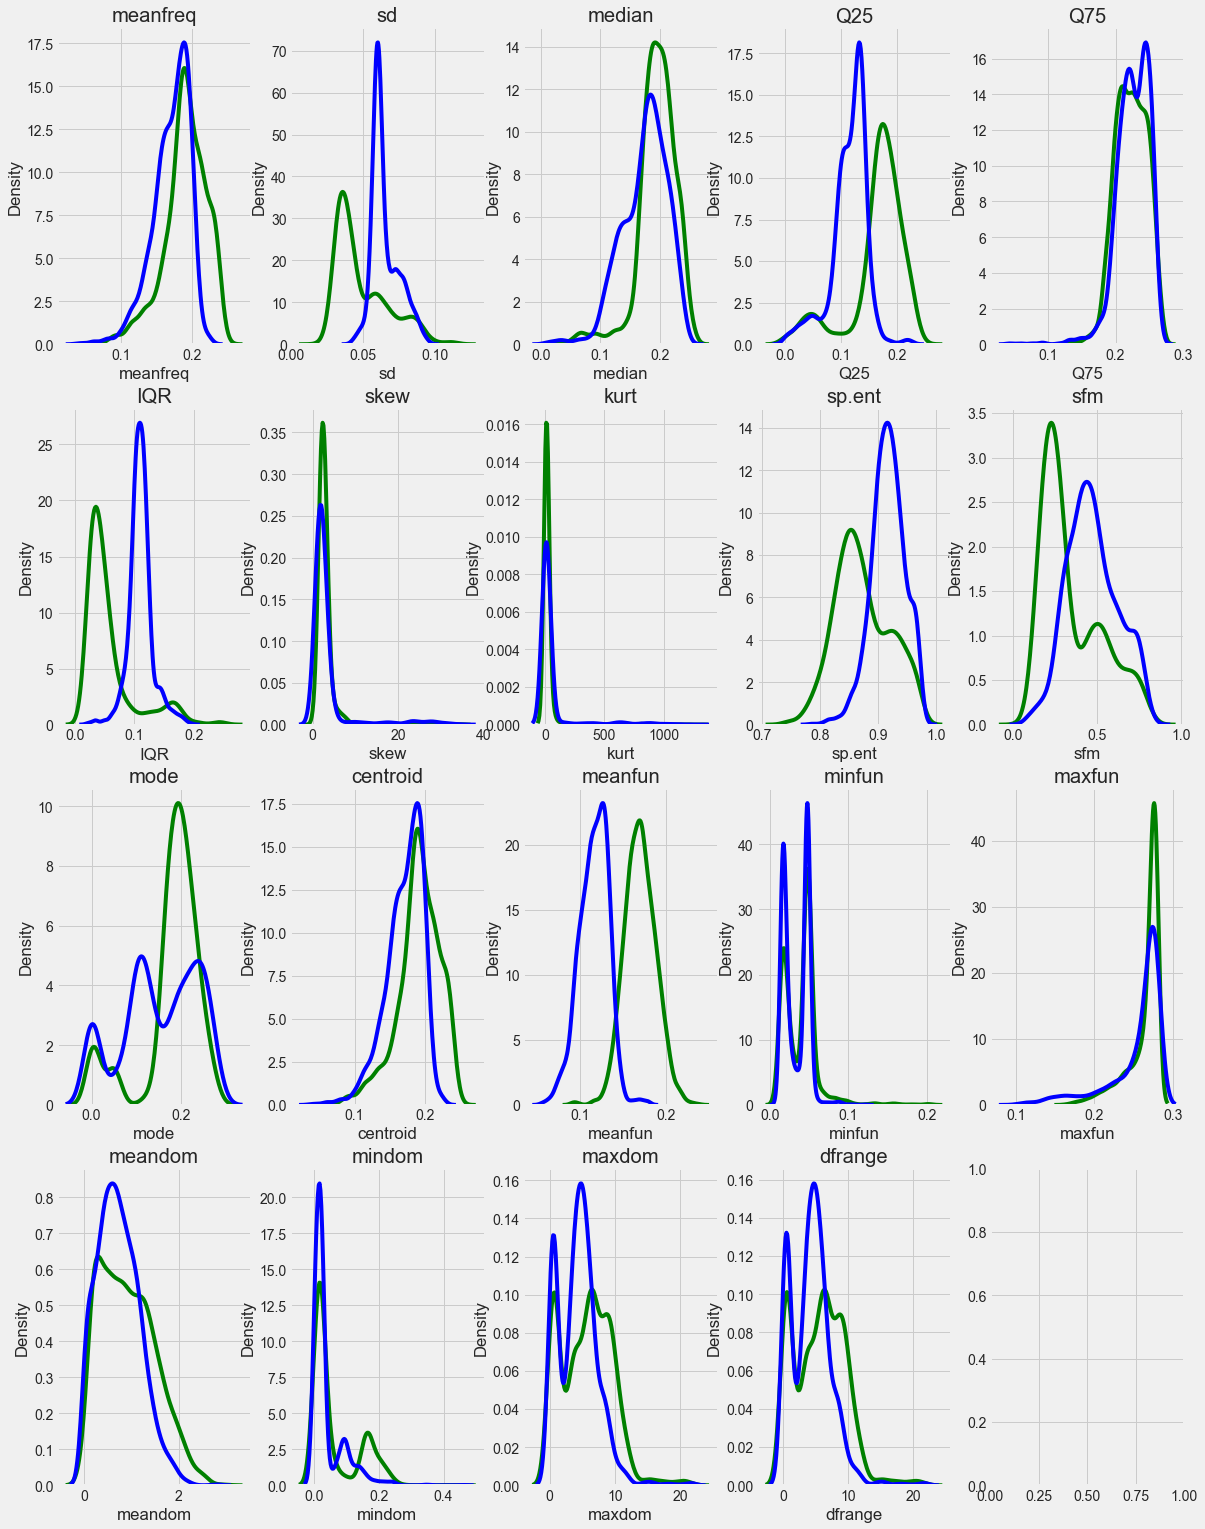

In [11]:
import seaborn as sns
plt.subplots(4,5,figsize = (18,25))

for i in range(1,20):
    plt.subplot(4,5,i)
    plt.title(df.columns[i-1])

    #(data=df, x='x', y='y', color='green', label='F')
    
    sns.kdeplot(df.loc[y == 0, df.columns[i-1]], color = "green",label = "F")
    sns.kdeplot(df.loc[y == 1, df.columns[i-1]], color = "blue", label = "M")

    
# Note : at the first glance we can clearly see the Q25,IQR,meanfun are the most significant features ,

In [12]:
print(X)

      meanfreq        sd    median       Q25       Q75       IQR       skew  \
0     0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1     0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2     0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3     0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4     0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   
...        ...       ...       ...       ...       ...       ...        ...   
3163  0.131884  0.084734  0.153707  0.049285  0.201144  0.151859   1.762129   
3164  0.116221  0.089221  0.076758  0.042718  0.204911  0.162193   0.693730   
3165  0.142056  0.095798  0.183731  0.033424  0.224360  0.190936   1.876502   
3166  0.143659  0.090628  0.184976  0.043508  0.219943  0.176435   1.591065   
3167  0.165509  0.092884  0.183044  0.070072  0.250827  0.180756   1.705029   

             kurt    sp.ent       sfm      mode  ce

In [13]:
#splitting the dataset into train and test set
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [14]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = StandardScaler.fit_transform(X_train)
#X_test = StandardScaler.transform(X_test)

C:\Users\buzurgaan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\buzurgaan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\buzurgaan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

C:\Users\buzurgaan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\buzurgaan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\buzurgaan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

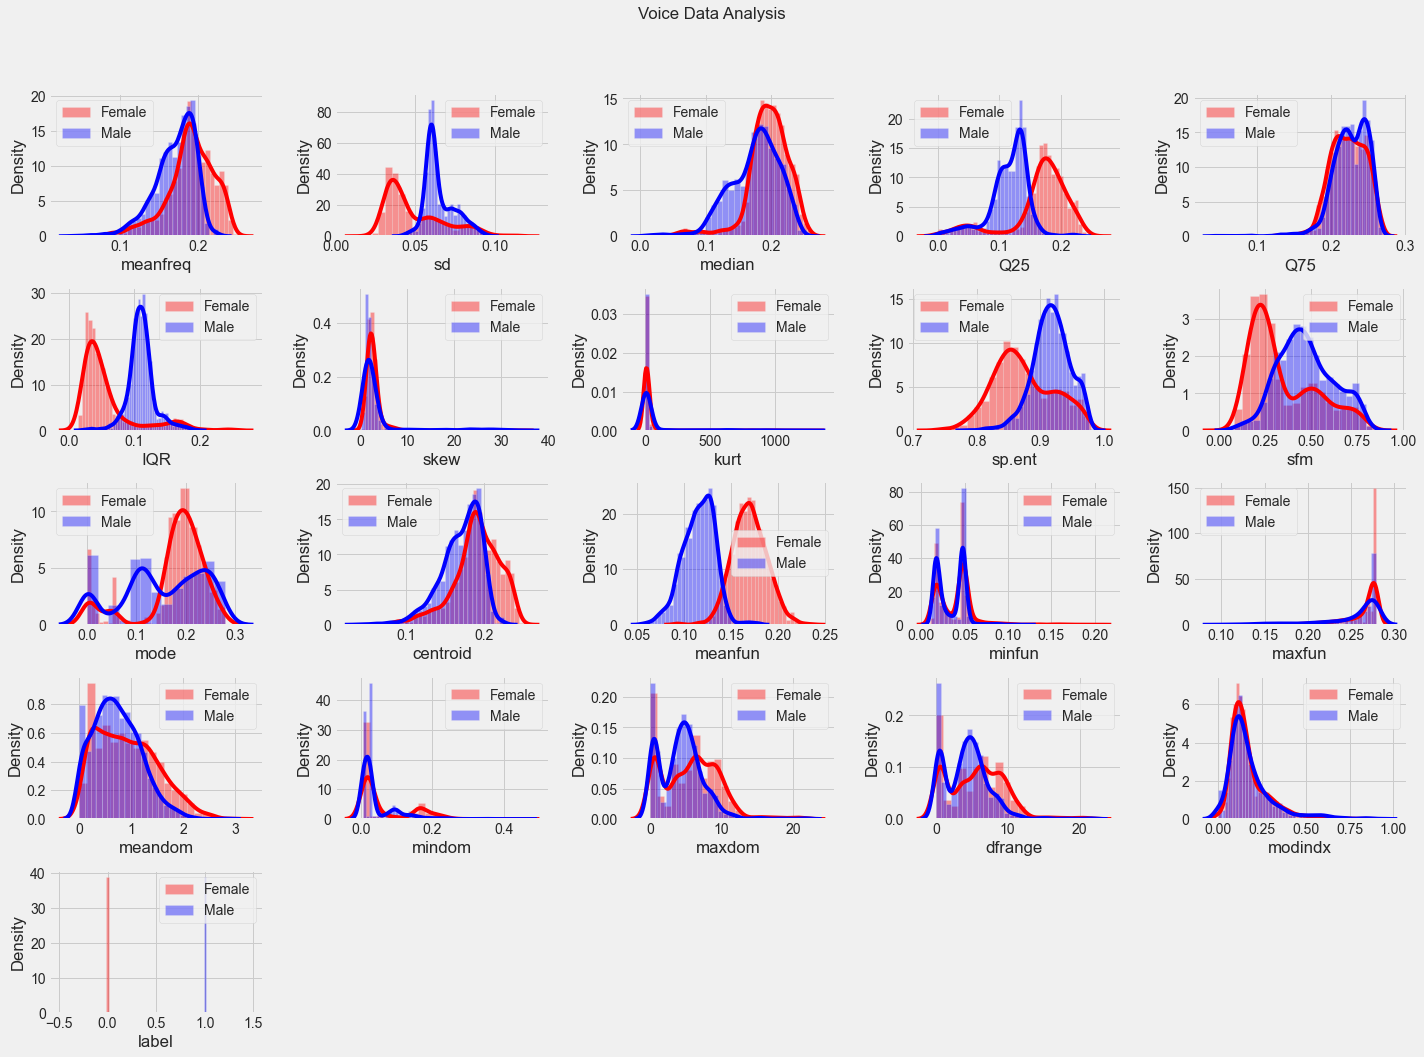

In [15]:
#Distance Plot 

fig = plt.figure(figsize = (20, 15))
j = 0
for i in df.columns:
    plt.subplot(5, 5, j+1)
    j += 1
    sns.distplot(df[i][df['label']==0], color='r', label = 'Female')
    sns.distplot(df[i][df['label']==1], color='b', label = 'Male')
    plt.legend(loc='best')
fig.suptitle('Voice Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.show()

In [16]:
selected_features = ['IQR','Q25','meanfun']

In [17]:
voice_df_X = df[selected_features]
voice_df_y = df.label

In [18]:
voice_df_X.head()

,IQR,Q25,meanfun
0,0.075122,0.015071,0.084279
1,0.073252,0.019414,0.107937
2,0.123207,0.008701,0.098706
3,0.111374,0.096582,0.088965
4,0.127325,0.078720,0.106398


In [19]:
voice_df_y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int32

# Train-Test Splitting :

In [20]:
# Splitting voice_df into 70% and 30% to construct Training and Testing Data respectively.
trainX, testX, trainy, testy = train_test_split(voice_df_X, voice_df_y,test_size=0.3,random_state=14)

In [21]:
trainX.shape

(2217, 3)

In [22]:
trainX.head()

,IQR,Q25,meanfun
2653,0.036981,0.181824,0.173871
1414,0.095385,0.120513,0.131851
2234,0.106400,0.094267,0.159553
2656,0.038068,0.160286,0.162500
2534,0.045874,0.172961,0.156238


In [23]:
trainy.shape

(2217,)

In [24]:
trainy.head()

2653    0
1414    1
2234    0
2656    0
2534    0
Name: label, dtype: int32

In [25]:
testX.shape

(951, 3)

In [26]:
testX.head()

,IQR,Q25,meanfun
2249,0.060443,0.202251,0.129881
1811,0.046376,0.172787,0.169441
2073,0.136636,0.110758,0.151754
996,0.103019,0.132516,0.113175
132,0.079563,0.175015,0.124133


In [27]:
testy.shape

(951,)

In [28]:
testy.head()

2249    0
1811    0
2073    0
996     1
132     1
Name: label, dtype: int32

# Optimizing Best Parameters for SVM Classifier :


In [29]:
def svm_kernel(trainX, trainy, testX, testy):
    rate=[]
    kernel=['rbf','poly','linear']
    for i in kernel:
        SVM_Model = SVC(kernel=i).fit(trainX,trainy)
        y_pred = SVM_Model.predict(trainX)
        print(i, 'Accuracy of Train Data : ', accuracy_score(trainy,y_pred))
        y_pred = SVM_Model.predict(testX)
        print(i, 'Accuracy of Test Data : ', accuracy_score(testy,y_pred))
        rate.append(accuracy_score(testy,y_pred))
    nloc = rate.index(max(rate))
    print("Highest accuracy is %s occurs at %s kernel." % (rate[nloc], kernel[nloc]))
    return kernel[nloc]

In [30]:
def svm_error(k,C,x_train,y_train,x_test,y_test):
    error_rate = []
    C = range(1,C)
    for i in C:
        model = SVC(kernel=k,C=i).fit(x_train,y_train)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    cloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at C=%s." % (error_rate[cloc], C[cloc]))

    plt.plot(C, error_rate, color='red', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)
    plt.title('Error Rate Vs C Value')
    plt.xlabel('C')
    plt.ylabel('Error Rate')
    plt.show()
    return C[cloc]

In [31]:
#testy = [0.62954338, 0.17415499, 0.75719559]
k = svm_kernel(trainX, trainy, testX, testy)

rbf Accuracy of Train Data :  0.970681100586378
rbf Accuracy of Test Data :  0.9737118822292324
poly Accuracy of Train Data :  0.9697789806044204
poly Accuracy of Test Data :  0.9716088328075709
linear Accuracy of Train Data :  0.914298601714028
linear Accuracy of Test Data :  0.9221871713985279
Highest accuracy is 0.9737118822292324 occurs at rbf kernel.


Lowest error is 0.023133543638275498 occurs at C=9.


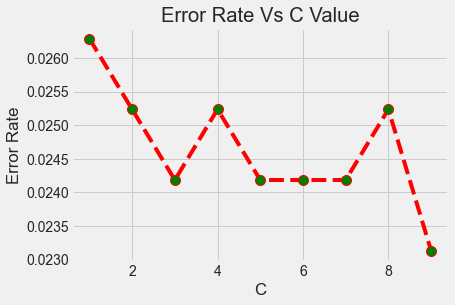

In [32]:
c = svm_error(k, 10, trainX, trainy, testX, testy)

# #Applying Dimensionality Reduction :

In [33]:
# Initializing Principal Component Analysis(PCA)
PCA_method = PCA(n_components=2)

In [34]:
# Fit And Transorm Data
traindf= PCA_method.fit_transform(trainX)
testdf = PCA_method.transform(testX)

# Visualization :

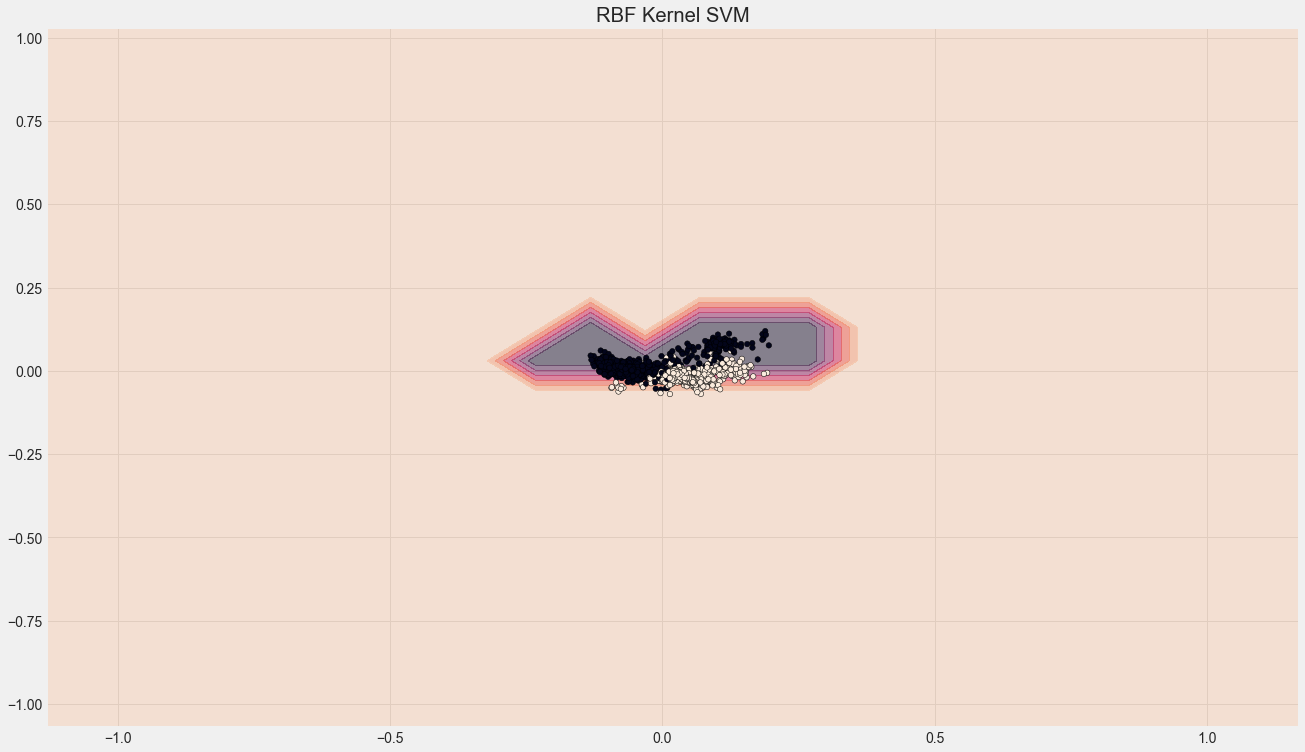

In [35]:
# Plotting decision regions
x_min, x_max = traindf[:, 0].min() - 1, traindf[:, 0].max() + 1
y_min, y_max = traindf[:, 1].min() - 1, traindf[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

f, ax = plt.subplots(figsize=(20, 12))

SVM_Model = SVC(kernel=k, C=c).fit(traindf,trainy)

for clf, tt in zip([SVM_Model],['RBF Kernel SVM']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.5)
    ax.scatter(traindf[:, 0], traindf[:, 1], c=trainy, s=30, edgecolor='k')
    ax.set_title(tt)
plt.show()


# Creating Final SVM Classifier :

In [36]:
# Initailizing the Final SVM Classifier
Final_SVM_Model = SVC(kernel=k, C=c)
# Train the model using the training sets
Final_SVM_Model.fit(trainX, trainy)

SVC(C=9)

# Perform Prediction on Training Data :¶

In [37]:
Final_SVM_Model_train_predictions = Final_SVM_Model.predict(trainX)

In [38]:
testX

,IQR,Q25,meanfun
2249,0.060443,0.202251,0.129881
1811,0.046376,0.172787,0.169441
2073,0.136636,0.110758,0.151754
996,0.103019,0.132516,0.113175
132,0.079563,0.175015,0.124133
...,...,...,...
1412,0.090643,0.149002,0.124491
656,0.111525,0.108263,0.103740
1499,0.113946,0.099507,0.101674
2733,0.063241,0.165586,0.158865


In [39]:
#testX =[ [0.62954338, 0.17415499, 0.75719559]]
Final_SVM_Model_test_predictions = Final_SVM_Model.predict(testX)

# Evaluation

In [40]:
#On Training :
print("SVM Model Confusion Matrix:")
print(confusion_matrix(trainy, Final_SVM_Model_train_predictions))

print("SVM Model Classification Report")
print(classification_report(trainy, Final_SVM_Model_train_predictions))

SVM Model Confusion Matrix:
[[1106   25]
 [  32 1054]]
SVM Model Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1131
           1       0.98      0.97      0.97      1086

    accuracy                           0.97      2217
   macro avg       0.97      0.97      0.97      2217
weighted avg       0.97      0.97      0.97      2217



In [41]:
#On Testing :

print("SVM Model Confusion Matrix:")
print(confusion_matrix(testy, Final_SVM_Model_test_predictions))

print("SVM Model Classification Report")
print(classification_report(testy, Final_SVM_Model_test_predictions))

SVM Model Confusion Matrix:
[[440  13]
 [  9 489]]
SVM Model Classification Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       453
           1       0.97      0.98      0.98       498

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951



# Predictions on Test Data :

In [42]:
OutputDF = pd.DataFrame({'Actual_label':testy,'Predicted_label':Final_SVM_Model_test_predictions})

In [43]:
#a code retunr by me to check the testy
testy

2249    0
1811    0
2073    0
996     1
132     1
       ..
1412    1
656     1
1499    1
2733    0
1769    0
Name: label, Length: 951, dtype: int32

In [44]:
#Save to csv
OutputDF.to_csv('gender_pred.csv',index=False)
OutputDF.head()

,Actual_label,Predicted_label
2249,0,1
1811,0,0
2073,0,0
996,1,1
132,1,1


In [45]:
# s [0.04325772,0.2144383,0.1834299]
# m2 [0.1117555,0.1203144,0.1135659]
# f2 [0.05253157,0.1990138,0.1952233]
# DR Shehzad = [0.1209091,0.135328,0.1176499]
Final_SVM_Model.predict([[0.05253157,0.1990138,0.1952233]])

array([0])

nan

In [46]:
import pickle

# create an iterator object with write permission - model.pkl
# with open('gender_model_saved.pkl', 'wb') as files:
#     pickle.dump(Final_SVM_Model, files)



In [47]:
import pickle
# load saved model
with open('gender_model_saved.pkl' , 'rb') as f:
    savd_mdl = pickle.load(f)

savd_mdl.predict([[0.1127701,0.1383497,0.1231064]])    

# from joblib import Parallel, delayed
# import joblib

# # joblib.dump(Final_SVM_Model, 'saved_model.joblib')
# knn_from_joblib = joblib.load('saved_model.joblib')

array([1])

In [55]:
# knn_from_joblib.predict([[0.1127701,0.1383497,0.1231064]])

In [49]:
# import pickle

# # Save the trained model as a pickle string.
# saved_model = pickle.dumps(Final_SVM_Model)
# knn_from_pickle = pickle.loads(saved_model)
  
# # Use the loaded pickled model to make predictions
# knn_from_pickle.predict([[0.1127701,0.1383497,0.1231064]])